<h1 align="center"><u>The Wine Land's Wines Variety Prediciton</u></h1>

### # Context:-
   • Imagine you are working as a Data Scientist for an Online Wine Shop named “The Wine Land”.

   •  As the name suggests, the online store specializes in selling different varieties of wines.
   
   • The online store receives a decent amount of traffic and reviews from its users.

   • Leverage the “reviews” data and draw actionable insights from it.
    
### # Objective:-
   • Build a predictive model for predicting the wine “variety”.

### # The Data Description is as follows:-

   •   <b>user_name - </b> user_name of the reviewer

   •   <b>country -</b> The country that the wine is from.

   •   <b>review_title - </b>The title of the wine review, which often contains the vintage

   •   <b>review_description -</b>  A verbose review of the wine.

   •   <b>designation - </b> The vineyard within the winery where the grapes that made the wine are from.
   
   •   <b>points - </b> ratings given by the user. The ratings are between 0 -100.
    
   •   <b>price - </b> The cost for a bottle of the wine.
   
   •   <b>province - </b> The province or state that the wine is from.

   •   <b>region_1 - </b> The wine-growing area in a province or state (ie Napa).

   •   <b>region_2 - </b> Sometimes there are more specific regions specified within a wine-growing area (ie Rutherford inside the Napa 
    Valley), but this value can sometimes be blank.

   •   <b>winery - </b> The winery that made the wine.
 
   •   <b>variety - </b>The type of grapes used to make the wine. Dependent variable for task 2 of the assignment.


## Importing some important libraries:-

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to remove the harmless warning
import warnings
warnings.filterwarnings('ignore')

# 1. loading our dataset:~

In [2]:
train = pd.read_csv(r'Knight ML Assignment\Data\train.csv')
test = pd.read_csv(r'Knight ML Assignment\Data\test.csv')

In [3]:
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [4]:
test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


# 2. Data Cleaning:~

In [5]:
train[(train.winery=='Elizabeth Chambers') & (train.province=='Oregon')]

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
8,@paulgwine,US,Elizabeth Chambers 2014 Falcon Glen Vineyard P...,"Displaying typical McMinnville AVA subtlety, t...",Falcon Glen Vineyard,91,48.0,Oregon,McMinnville,Willamette Valley,Elizabeth Chambers,Pinot Noir
9814,@paulgwine,US,Elizabeth Chambers 2011 Freedom Hill Vineyard ...,"Graceful, and elegant, this offers achingly pu...",Freedom Hill Vineyard,91,45.0,Oregon,Willamette Valley,Willamette Valley,Elizabeth Chambers,Pinot Noir
21367,@paulgwine,US,Elizabeth Chambers 2014 Lazy River Vineyard Pi...,"Bright and clear, this young wine is powered b...",Lazy River Vineyard,94,48.0,Oregon,Willamette Valley,NaN,Elizabeth Chambers,Pinot Noir
24399,@paulgwine,US,Elizabeth Chambers 2014 Pinot Gris (Willamette...,This is a sophisticated blend of tart yellow f...,NaN,90,18.0,Oregon,Willamette Valley,Willamette Valley,Elizabeth Chambers,Pinot Gris
26988,@paulgwine,US,Elizabeth Chambers 2014 Pinot Gris (Willamette...,This is a sophisticated blend of tart yellow f...,NaN,90,18.0,Oregon,Willamette Valley,Willamette Valley,Elizabeth Chambers,Pinot Gris
27683,@paulgwine,US,Elizabeth Chambers 2014 Winemaker's Cuvée Pino...,"Tasted alongside the 2013, this is bigger, bol...",Winemaker's Cuvée,92,35.0,Oregon,Willamette Valley,Willamette Valley,Elizabeth Chambers,Pinot Noir
32509,@paulgwine,US,Elizabeth Chambers 2013 Winemaker's Cuvée Pino...,"This is lovely in color, scent and flavor. Ele...",Winemaker's Cuvée,93,35.0,Oregon,Willamette Valley,Willamette Valley,Elizabeth Chambers,Pinot Noir
45827,@paulgwine,US,Elizabeth Chambers 2014 Menefee Vineyard Pinot...,Some winemakers have a special feel for Pinot ...,Menefee Vineyard,93,48.0,Oregon,Willamette Valley,NaN,Elizabeth Chambers,Pinot Noir
52555,@paulgwine,US,Elizabeth Chambers 2014 Falcon Glen Vineyard P...,"Displaying typical McMinnville AVA subtlety, t...",Falcon Glen Vineyard,91,48.0,Oregon,McMinnville,Willamette Valley,Elizabeth Chambers,Pinot Noir
65301,@paulgwine,US,Elizabeth Chambers 2012 Winemaker's Cuvée Pino...,The winery's multiple vineyard designates are ...,Winemaker's Cuvée,93,35.0,Oregon,Willamette Valley,Willamette Valley,Elizabeth Chambers,Pinot Noir


In [6]:
train.isna().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [7]:
test.isna().sum()

user_name              4738
country                   4
review_title              0
review_description        0
designation            5989
points                    0
price                  1394
province                  4
region_1               3314
region_2              11751
winery                    0
dtype: int64

* <h6>For this problem, one of the important feature is review_description as it is not having a single missing value in training and testing data. And description will give the quality, taste, ingredient which can be unique to each wine.</h6>
 
* <h6>review_title is also an important feature for the prediciton.</h6>

* <h6>After looking deep into winery, they came to be an important. The reasons can be:-</h6>

    * Each winery have there specialities.
   
    * Only region is also responsible because certain things grow in certain areas so they use that growing things and make wine from it

#### # Some feature which we will drop:-
    
   * points feature is according to the persons liking it didn't tell us about the variety.
   * price feature will differ to each country beacause of taxes, quantity, etc it didn't tell us about the variety.
   * Drop all leaving review_title and review_description.

In [8]:
# creating new train and test data.
train1 = train[['review_title','review_description','winery','variety']]
test1 = test[['review_title','review_description','winery']]

In [9]:
train1.head()

,review_title,review_description,winery,variety
0,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Andrew Peace,Chardonnay
1,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,North by Northwest,Red Blend
2,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Renato Ratti,Nebbiolo
3,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Château du Cèdre,Malbec


In [10]:
train1.isna().sum()

review_title          0
review_description    0
winery                0
variety               0
dtype: int64

In [11]:
test1.isna().sum()

review_title          0
review_description    0
winery                0
dtype: int64

In [12]:
t = train1.drop('variety',1) # training data
v = train1['variety']

In [13]:
t.head()

,review_title,review_description,winery
0,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Andrew Peace
1,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,North by Northwest
2,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Renato Ratti
3,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,Domaine l'Ancienne Cure
4,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Château du Cèdre


In [14]:
v[:5]

0                    Chardonnay
1                     Red Blend
2                      Nebbiolo
3    Bordeaux-style White Blend
4                        Malbec
Name: variety, dtype: object

# 3. Data Preprocessing:~

In [15]:
t.winery.value_counts()

Testarossa               175
Louis Latour             168
Williams Selyem          165
Georges Duboeuf          163
Chateau Ste. Michelle    163
                        ... 
Mas Foraster               1
Araujo                     1
Pioiero                    1
Ashokawna                  1
Ermacora                   1
Name: winery, Length: 13786, dtype: int64

In [16]:
message = t.copy()

In [17]:
message

,review_title,review_description,winery
0,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Andrew Peace
1,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,North by Northwest
2,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Renato Ratti
3,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,Domaine l'Ancienne Cure
4,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Château du Cèdre
...,...,...,...
82652,Montecillo 2007 Crianza (Rioja),"Hot earth, baked cherry and mild vanilla aroma...",Montecillo
82653,Vivác Winery 2008 Single Vineyard Cabernet Sau...,"Pungent, high-pitched notes of turmeric and dr...",Vivác Winery
82654,Domaine de la Madone 2014 Nouveau (Beaujolais...,This is a wine that's not just lively and frui...,Domaine de la Madone
82655,Château Beaumont 2011 Haut-Médoc,"An impressive wine, it already shows signs of ...",Château Beaumont


In [18]:
# Preprocessing of the data
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
lemmatizer = WordNetLemmatizer()
corpus1 = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['review_title'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus1.append(review)

In [296]:
corpus1[1]

'north northwest red columbia valley wa'

In [20]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500,ngram_range=(1,3))
x1 = cv.fit_transform(corpus1).toarray()

In [21]:
x1.shape

(82657, 2500)

In [22]:
cv.get_feature_names()[:20]

['aconcagua',
 'aconcagua valley',
 'adam',
 'adega',
 'adega cooperativa',
 'adelaida',
 'adelaide',
 'adelaide hill',
 'adelsheim',
 'adige',
 'aegerter',
 'agricola',
 'air',
 'airfield',
 'airfield estate',
 'aix',
 'aix en',
 'aix en provence',
 'al',
 'alain']

In [23]:
x1_1 = pd.DataFrame(x1, columns=cv.get_feature_names())

In [24]:
x1_1

,aconcagua,aconcagua valley,adam,adega,adega cooperativa,adelaida,adelaide,adelaide hill,adelsheim,adige,...,zinfandel mendocino,zinfandel napa,zinfandel napa valley,zinfandel paso,zinfandel paso roble,zinfandel russian,zinfandel russian river,zinfandel sonoma,zinfandel sonoma county,zinfandel sonoma valley
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Preprocessing of the data
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
lemmatizer = WordNetLemmatizer()
corpus2 = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['review_description'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus2.append(review)

In [295]:
corpus2[1]

'wine near equal part syrah merlot balance cabernet sauvignon aroma blue fruit vanilla cherry herb lead full bodied pit fruit flavor bring sense deliciousness hard resist'

In [27]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500,ngram_range=(1,3))
x2 = cv.fit_transform(corpus2).toarray()

In [28]:
x2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
x2.shape

(82657, 2500)

In [30]:
cv.get_feature_names()[:20]

['abound',
 'abundant',
 'accent',
 'accented',
 'accessible',
 'accompanied',
 'acid',
 'acid tannin',
 'acidic',
 'acidity',
 'acidity balance',
 'acidity crisp',
 'acidity cut',
 'acidity drink',
 'acidity dry',
 'acidity end',
 'acidity fine',
 'acidity finish',
 'acidity firm',
 'acidity flavor']

In [31]:
x2_1 = pd.DataFrame(x2, columns=cv.get_feature_names())

In [32]:
x2_1

,abound,abundant,accent,accented,accessible,accompanied,acid,acid tannin,acidic,acidity,...,young,young wine,youth,youthful,zest,zesty,zesty acidity,zin,zinfandel,zippy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82652,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
82653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
t.head()

,review_title,review_description,winery
0,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Andrew Peace
1,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,North by Northwest
2,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Renato Ratti
3,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,Domaine l'Ancienne Cure
4,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Château du Cèdre


In [34]:
x3 = t.drop(['review_title','review_description'],1)

In [35]:
x3

,winery
0,Andrew Peace
1,North by Northwest
2,Renato Ratti
3,Domaine l'Ancienne Cure
4,Château du Cèdre
...,...
82652,Montecillo
82653,Vivác Winery
82654,Domaine de la Madone
82655,Château Beaumont


In [36]:
import numpy as np

In [37]:
def data_train(feature):
    top_10 = [x for x in x3[feature].value_counts().sort_values(ascending=False).head(10).index]
    for label in top_10:
        x3[label] = np.where(x3[feature]==label,1,0)
    return x3[[feature]+ top_10]

In [38]:
x3_1 = data_train('winery')
x3_1

,winery,Testarossa,Louis Latour,Williams Selyem,Georges Duboeuf,Chateau Ste. Michelle,Wines & Winemakers,DFJ Vinhos,Concha y Toro,Columbia Crest,Kendall-Jackson
0,Andrew Peace,0,0,0,0,0,0,0,0,0,0
1,North by Northwest,0,0,0,0,0,0,0,0,0,0
2,Renato Ratti,0,0,0,0,0,0,0,0,0,0
3,Domaine l'Ancienne Cure,0,0,0,0,0,0,0,0,0,0
4,Château du Cèdre,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
82652,Montecillo,0,0,0,0,0,0,0,0,0,0
82653,Vivác Winery,0,0,0,0,0,0,0,0,0,0
82654,Domaine de la Madone,0,0,0,0,0,0,0,0,0,0
82655,Château Beaumont,0,0,0,0,0,0,0,0,0,0


In [39]:
x3_1 = x3_1.drop('winery',1)

In [40]:
x3_1

,Testarossa,Louis Latour,Williams Selyem,Georges Duboeuf,Chateau Ste. Michelle,Wines & Winemakers,DFJ Vinhos,Concha y Toro,Columbia Crest,Kendall-Jackson
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
82652,0,0,0,0,0,0,0,0,0,0
82653,0,0,0,0,0,0,0,0,0,0
82654,0,0,0,0,0,0,0,0,0,0
82655,0,0,0,0,0,0,0,0,0,0


In [41]:
X_data = pd.concat([x1_1,x2_1,x3_1],1)

In [42]:
X_data

,aconcagua,aconcagua valley,adam,adega,adega cooperativa,adelaida,adelaide,adelaide hill,adelsheim,adige,...,Testarossa,Louis Latour,Williams Selyem,Georges Duboeuf,Chateau Ste. Michelle,Wines & Winemakers,DFJ Vinhos,Concha y Toro,Columbia Crest,Kendall-Jackson
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
v.head()

0                    Chardonnay
1                     Red Blend
2                      Nebbiolo
3    Bordeaux-style White Blend
4                        Malbec
Name: variety, dtype: object

In [44]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Valid_train, Valid_test = train_test_split(X_data, v, test_size=0.33, random_state=0)

In [45]:
import matplotlib.pyplot as plt

# 4. MultinomialNB Algorithm:

In [46]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [47]:
from sklearn import metrics

In [48]:
classifier.fit(X_train, Valid_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
pred = classifier.predict(X_test)
score = metrics.accuracy_score(Valid_test, pred)

In [50]:
score

0.8714301426109909

# 5. Test data preperation:~

In [51]:
test1.head()

,review_title,review_description,winery
0,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Boedecker Cellars
1,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Mendoza Vineyards
2,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",Prime
3,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Bodega Cuarto Dominio
4,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",SassodiSole


In [52]:
message = test1.copy()

In [53]:
# Preprocessing of the data
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
lemmatizer = WordNetLemmatizer()
corpus_a = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['review_title'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_a.append(review)

In [294]:
corpus_a[1]

'mendoza vineyard gran reserva richard bonvin malbec mendoza'

In [55]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500,ngram_range=(1,3))
xa = cv.fit_transform(corpus_a).toarray()

In [56]:
xa.shape

(20665, 2500)

In [57]:
cv.get_feature_names()[:20]

['aconcagua',
 'aconcagua valley',
 'adam',
 'adega',
 'adega cooperativa',
 'adelaida',
 'adelaida district',
 'adelaide',
 'adelaide hill',
 'adelsheim',
 'adige',
 'aegerter',
 'agricola',
 'air',
 'airfield',
 'airfield estate',
 'aix',
 'aix en',
 'aix en provence',
 'al']

In [58]:
xa_1 = pd.DataFrame(xa, columns=cv.get_feature_names())

In [59]:
xa_1

,aconcagua,aconcagua valley,adam,adega,adega cooperativa,adelaida,adelaida district,adelaide,adelaide hill,adelsheim,...,zinfandel mendocino,zinfandel napa,zinfandel napa valley,zinfandel paso,zinfandel paso roble,zinfandel russian,zinfandel russian river,zinfandel sonoma,zinfandel sonoma county,zinfandel sonoma valley
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Preprocessing of the data
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
lemmatizer = WordNetLemmatizer()
corpus_b = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['review_description'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_b.append(review)

In [293]:
corpus_b[1]

'charred smoky herbal aroma blackberry trend direction exotic showing barrel driven scent vanilla clove exhibit plenty depth sponginess along toasty herbal flavor plum blackberry pepper burnt toast clove blueberry flavor carry finish hefty malbec drink'

In [62]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500,ngram_range=(1,3))
xb = cv.fit_transform(corpus_b).toarray()

In [63]:
xb.shape

(20665, 2500)

In [64]:
cv.get_feature_names()[:20]

['abound',
 'abundant',
 'accent',
 'accented',
 'accessible',
 'accompanied',
 'acid',
 'acid tannin',
 'acidic',
 'acidity',
 'acidity balance',
 'acidity crisp',
 'acidity cut',
 'acidity drink',
 'acidity end',
 'acidity fine',
 'acidity finish',
 'acidity firm',
 'acidity flavor',
 'acidity give']

In [65]:
xb_1 = pd.DataFrame(xb, columns=cv.get_feature_names())

In [66]:
xb_1

,abound,abundant,accent,accented,accessible,accompanied,acid,acid tannin,acidic,acidity,...,young wine,youth,youthful,youthfully,zest,zesty,zesty acidity,zin,zinfandel,zippy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
message.head()

,review_title,review_description,winery
0,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Boedecker Cellars
1,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Mendoza Vineyards
2,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",Prime
3,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Bodega Cuarto Dominio
4,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",SassodiSole


In [68]:
xc = message.drop(['review_title','review_description'],1)

In [69]:
xc

,winery
0,Boedecker Cellars
1,Mendoza Vineyards
2,Prime
3,Bodega Cuarto Dominio
4,SassodiSole
...,...
20660,Yorkville Cellars
20661,Château Ribaute
20662,Daou
20663,Peñascal


In [70]:
def data_test(feature):
    top_10 = [x for x in xc[feature].value_counts().sort_values(ascending=False).head(10).index]
    for label in top_10:
        xc[label] = np.where(xc[feature]==label,1,0)
    return xc[[feature]+ top_10]

In [71]:
xc_1 = data_test('winery')
xc_1

,winery,Testarossa,Wines & Winemakers,Williams Selyem,Georges Duboeuf,Columbia Crest,Louis Latour,Casa Santos Lima,Kendall-Jackson,Gary Farrell,DFJ Vinhos
0,Boedecker Cellars,0,0,0,0,0,0,0,0,0,0
1,Mendoza Vineyards,0,0,0,0,0,0,0,0,0,0
2,Prime,0,0,0,0,0,0,0,0,0,0
3,Bodega Cuarto Dominio,0,0,0,0,0,0,0,0,0,0
4,SassodiSole,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
20660,Yorkville Cellars,0,0,0,0,0,0,0,0,0,0
20661,Château Ribaute,0,0,0,0,0,0,0,0,0,0
20662,Daou,0,0,0,0,0,0,0,0,0,0
20663,Peñascal,0,0,0,0,0,0,0,0,0,0


In [72]:
xc_1 = xc_1.drop('winery',1)

In [73]:
xc_1

,Testarossa,Wines & Winemakers,Williams Selyem,Georges Duboeuf,Columbia Crest,Louis Latour,Casa Santos Lima,Kendall-Jackson,Gary Farrell,DFJ Vinhos
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
20660,0,0,0,0,0,0,0,0,0,0
20661,0,0,0,0,0,0,0,0,0,0
20662,0,0,0,0,0,0,0,0,0,0
20663,0,0,0,0,0,0,0,0,0,0


In [74]:
test_data = pd.concat([xa_1,xb_1,xc_1],1)

In [75]:
test_data

,aconcagua,aconcagua valley,adam,adega,adega cooperativa,adelaida,adelaida district,adelaide,adelaide hill,adelsheim,...,Testarossa,Wines & Winemakers,Williams Selyem,Georges Duboeuf,Columbia Crest,Louis Latour,Casa Santos Lima,Kendall-Jackson,Gary Farrell,DFJ Vinhos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
classifier=MultinomialNB()

In [77]:
classifier.fit(X_data, v)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [78]:
prediction = classifier.predict(test_data)

In [79]:
prediction

array(['Portuguese White', 'Rhône-style Red Blend', 'Zinfandel', ...,
       'Cabernet Franc', 'Gewürztraminer', 'Cabernet Franc'], dtype='<U26')

In [80]:
prediction.shape

(20665,)

In [81]:
pred = pd.DataFrame({'variety':prediction})

In [82]:
pred

,variety
0,Portuguese White
1,Rhône-style Red Blend
2,Zinfandel
3,Merlot
4,Merlot
...,...
20660,Cabernet Franc
20661,Merlot
20662,Cabernet Franc
20663,Gewürztraminer


In [83]:
pred.variety.value_counts()

Cabernet Franc                3638
Gewürztraminer                2663
Merlot                        2406
White Blend                   1346
Rhône-style Red Blend         1236
Champagne Blend               1010
Bordeaux-style White Blend     954
Pinot Grigio                   828
Red Blend                      709
Syrah                          640
Gamay                          618
Sparkling Blend                567
Chardonnay                     521
Pinot Gris                     520
Zinfandel                      503
Portuguese White               375
Rosé                           349
Cabernet Sauvignon             298
Grüner Veltliner               271
Pinot Noir                     242
Malbec                         230
Tempranillo                    210
Bordeaux-style Red Blend       157
Sauvignon Blanc                133
Sangiovese                     102
Riesling                        94
Nebbiolo                        27
Portuguese Red                  18
Name: variety, dtype

# Data Analysis:~

In [90]:
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [91]:
train.points.max()

100

In [108]:
Top_wines = train[['variety','points']][(train.points>=90)]

In [118]:
var = Top_wines.variety.unique()
var

array(['Nebbiolo', 'Red Blend', 'Zinfandel', 'Pinot Noir',
       'Sauvignon Blanc', 'Chardonnay', 'Bordeaux-style Red Blend',
       'Syrah', 'Sangiovese', 'Cabernet Franc', 'Rhône-style Red Blend',
       'Champagne Blend', 'Cabernet Sauvignon', 'Portuguese Red',
       'Riesling', 'Malbec', 'Bordeaux-style White Blend',
       'Sparkling Blend', 'Tempranillo', 'Gamay', 'Grüner Veltliner',
       'Rosé', 'Merlot', 'Pinot Gris', 'White Blend', 'Portuguese White',
       'Pinot Grigio', 'Gewürztraminer'], dtype=object)

In [188]:
def top_rated_wines(point):
    Top_wines = train[['variety','points']][(train.points>=point)]
    var = Top_wines.variety.unique()
    top_rated_wines
    new_data = pd.DataFrame()
    types = []
    rating_mean = [] 
    for x in var:
        a = Top_wines[Top_wines['variety']==x]
        b = a.points.mean()
        types.append(x)
        rating_mean.append(b)
    new_data['types'] = types
    new_data['rating_mean'] = rating_mean
    # sorting data frame by rating 
    new_data.sort_values("rating_mean", axis = 0, ascending = False, inplace = True)
    return new_data

In [189]:
data = top_rated_wines(90)

In [192]:
# Top 10 rated wines
data[:10]

,types,rating_mean
16,Bordeaux-style White Blend,92.320755
0,Nebbiolo,92.009455
11,Champagne Blend,92.008375
3,Pinot Noir,91.943685
6,Bordeaux-style Red Blend,91.860165
12,Cabernet Sauvignon,91.801396
13,Portuguese Red,91.799756
14,Riesling,91.783294
7,Syrah,91.764112
5,Chardonnay,91.705375


In [195]:
# All time best rated wines
data = top_rated_wines(50)
data

,types,rating_mean
2,Nebbiolo,90.283675
10,Grüner Veltliner,90.051185
20,Champagne Blend,89.723742
22,Riesling,89.465284
7,Pinot Noir,89.417210
13,Syrah,89.278347
18,Rhône-style Red Blend,89.171743
11,Bordeaux-style Red Blend,89.102601
16,Portuguese Red,88.780599
3,Bordeaux-style White Blend,88.692941


## Wines rating of the world

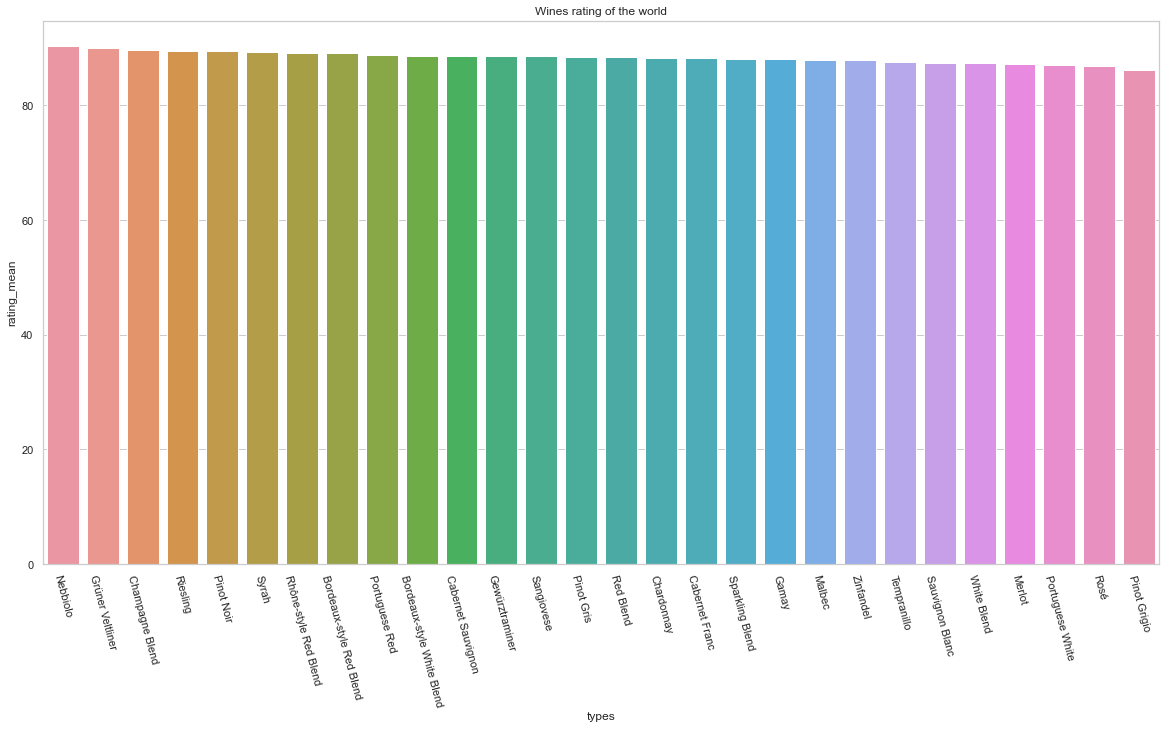

In [216]:
fig,ax = plt.subplots(figsize=(20,10));
sns.set(style="whitegrid")
sns.barplot( y="rating_mean", x='types',ax = ax, data=data).set_title("Wines rating of the world")
# Rotate x-labels
plt.xticks(rotation=-75);

## Q- Can prices change the rating of the wines?

In [219]:
d = train.dropna(axis=0)

In [220]:
d

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
6,@wawinereport,US,Gordon Estate 2012 Tradition Red (Columbia Val...,"Half Syrah and half Cabernet Sauvignon, with 4...",Tradition,91,45.0,Washington,Columbia Valley (WA),Columbia Valley,Gordon Estate,Red Blend
7,@vboone,US,Rock Wall 2014 Monte Rosso Reserve Zinfandel (...,"High-toned red fruit stars in this wine, a nic...",Monte Rosso Reserve,90,50.0,California,Sonoma County,Sonoma,Rock Wall,Zinfandel
8,@paulgwine,US,Elizabeth Chambers 2014 Falcon Glen Vineyard P...,"Displaying typical McMinnville AVA subtlety, t...",Falcon Glen Vineyard,91,48.0,Oregon,McMinnville,Willamette Valley,Elizabeth Chambers,Pinot Noir
10,@vboone,US,Cuvaison 2014 Estate Grown Sauvignon Blanc (Ca...,With an alluring bouquet of fresh-cut jasmine ...,Estate Grown,90,18.0,California,Carneros,Napa-Sonoma,Cuvaison,Sauvignon Blanc
34,@paulgwine,US,Durant 2013 Raven Chardonnay (Dundee Hills),"Peach pit, apple and pear fruit flavors combin...",Raven,92,25.0,Oregon,Dundee Hills,Willamette Valley,Durant,Chardonnay
...,...,...,...,...,...,...,...,...,...,...,...,...
82630,@vboone,US,Yorkville Cellars 2010 Randle Hill Vineyard Sa...,"A glass of pretty aromatics, grapefruit and or...",Randle Hill Vineyard,88,18.0,California,Yorkville Highlands,North Coast,Yorkville Cellars,Sauvignon Blanc
82632,@vboone,US,un4seen 2009 Red blend Red (California),"Dark like a cave in color, this big red blend ...",Red blend,85,10.0,California,California,California Other,un4seen,Red Blend
82639,@paulgwine,US,Archery Summit 2012 Red Hills Estate Pinot Noi...,"Showing a light whiff of funk, this seems a bi...",Red Hills Estate,92,85.0,Oregon,Dundee Hills,Willamette Valley,Archery Summit,Pinot Noir
82641,@gordone_cellars,US,The Withers Winery 2013 Mr. Burgess Red (El Do...,"Imposing, concentrated and tannic, this Syrah-...",Mr. Burgess,92,36.0,California,El Dorado,Sierra Foothills,The Withers Winery,Rhône-style Red Blend


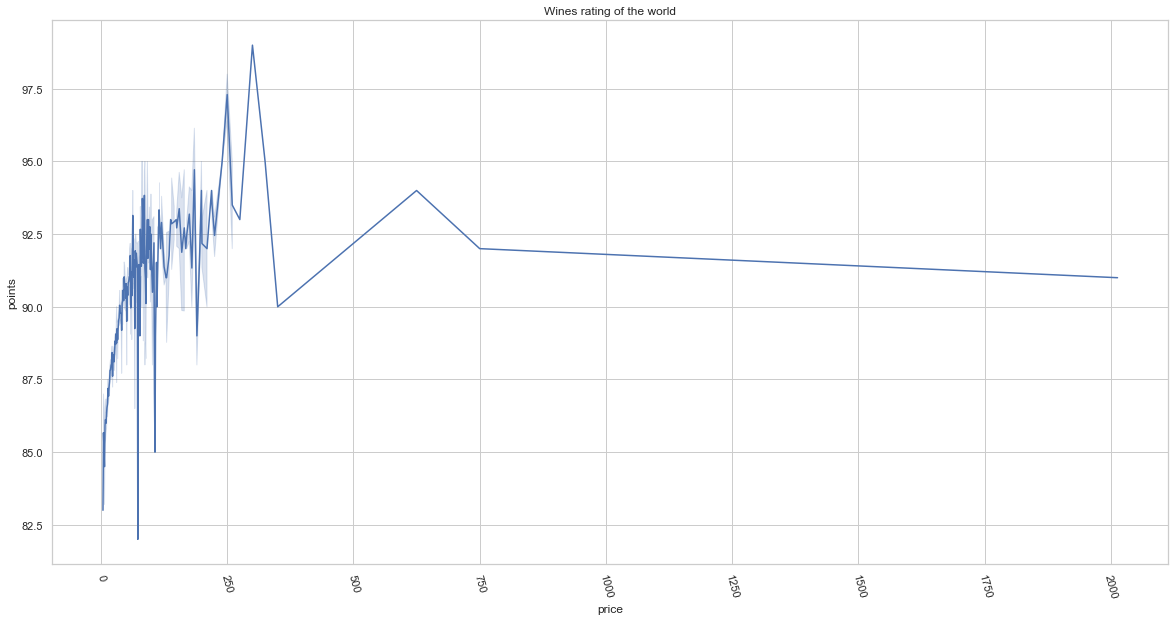

In [225]:
fig,ax = plt.subplots(figsize=(20,10));
sns.set(style="whitegrid")
sns.lineplot( y="points", x='price',ax = ax, data=d).set_title("Wines rating of the world")
plt.xticks(rotation=-75);

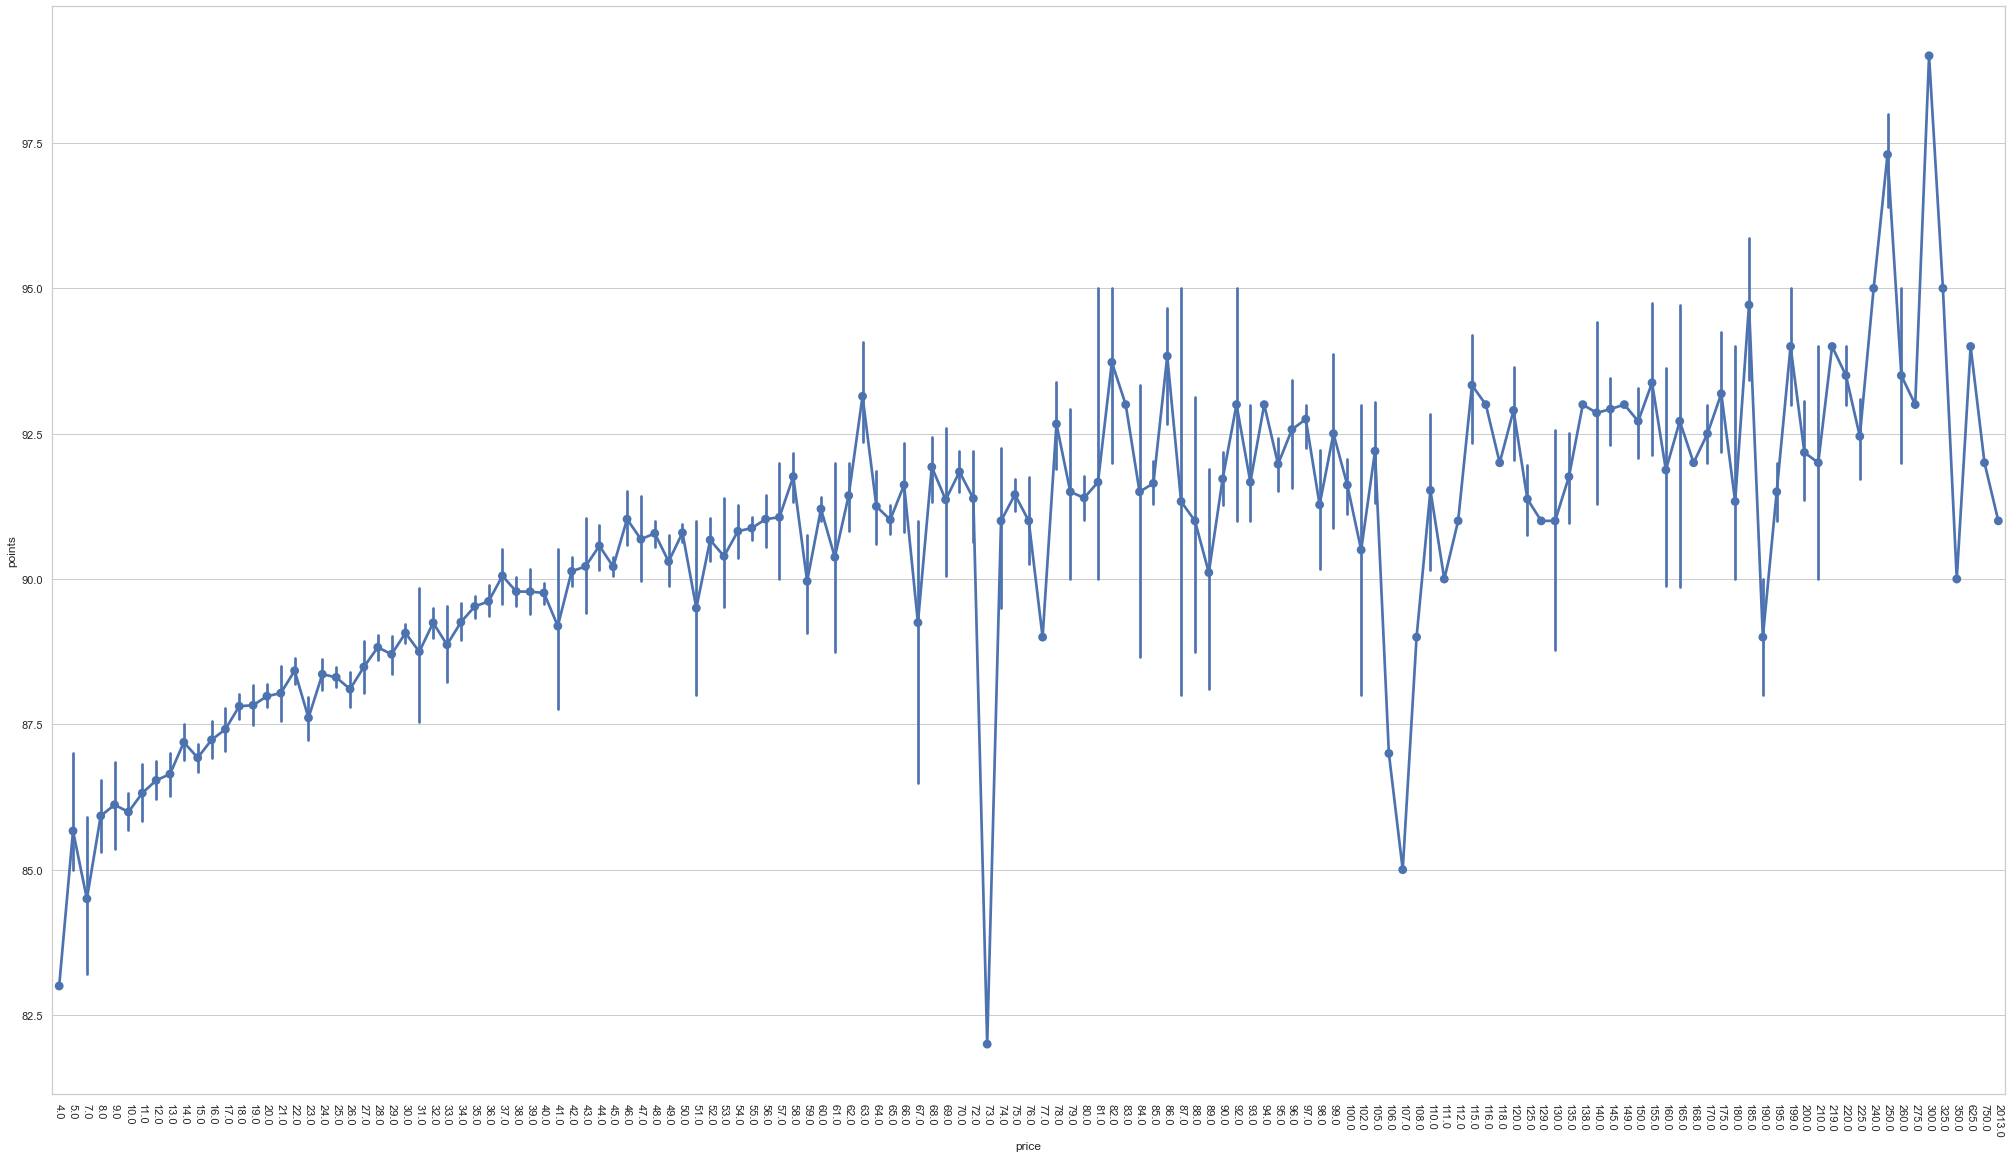

In [240]:
fig,ax = plt.subplots(figsize=(35,20));
sns.pointplot(ax=ax,x='price',y="points",data=d)
plt.xticks(rotation=-90);

### From above both graphs give us the idea that rate is directly proportional to prices

## Countries ranks in best rated wine productions:-

In [234]:
def top_rated_wines(point):
    Top_wines = train[['country','points']][(train.points>=point)]
    var = Top_wines.country.unique()
    top_rated_wines
    new_data = pd.DataFrame()
    country_name = []
    rating_mean = [] 
    for x in var:
        a = Top_wines[Top_wines['country']==x]
        b = a.points.mean()
        country_name.append(x)
        rating_mean.append(b)
    new_data['country_name'] = country_name
    new_data['rating_mean'] = rating_mean
    # sorting data frame by rating 
    new_data.sort_values("rating_mean", axis = 0, ascending = False, inplace = True)
    return new_data

In [236]:
data = top_rated_wines(90)[:-1]

In [237]:
data

,country_name,rating_mean
24,Hungary,92.142857
9,England,92.102041
4,France,91.881105
10,Austria,91.801633
0,Italy,91.662973
1,US,91.655187
6,Germany,91.629431
5,Portugal,91.590734
26,Mexico,91.500000
13,Argentina,91.360140


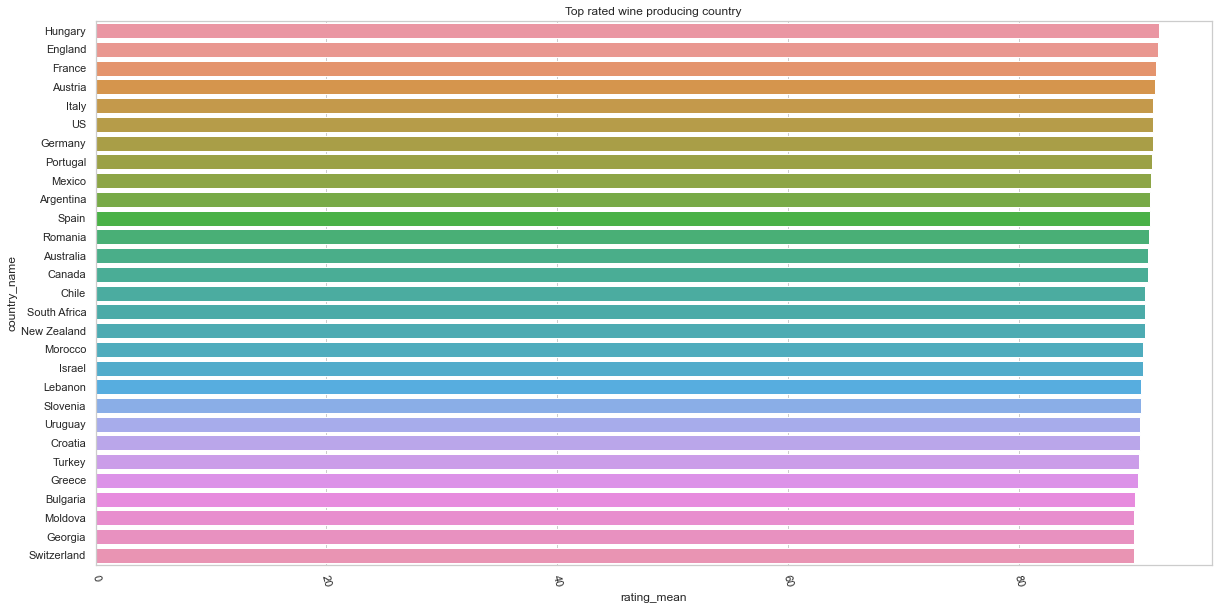

In [239]:
fig,ax = plt.subplots(figsize=(20,10));
sns.barplot( y="country_name", x='rating_mean',ax = ax, data=data).set_title('Top rated wine producing country')
# Rotate x-labels
plt.xticks(rotation=-75);

In [241]:
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


# Top 10 wineries in the world:~

In [242]:
# This fuction will give us top 10 wineries in the world
def top_rated_wines(point):
    Top_wines = train[['winery','points']][(train.points>=point)]
    var = Top_wines.winery.unique()
    top_rated_wines
    new_data = pd.DataFrame()
    winery_name = []
    rating_mean = [] 
    for x in var:
        a = Top_wines[Top_wines['winery']==x]
        b = a.points.mean()
        winery_name.append(x)
        rating_mean.append(b)
    new_data['winery_name'] = winery_name
    new_data['rating_mean'] = rating_mean
    # sorting data frame by rating 
    new_data.sort_values("rating_mean", axis = 0, ascending = False, inplace = True)
    return new_data[:10]

In [244]:
data = top_rated_wines(90)

In [291]:
data

,winery_name,rating_mean
6132,Araujo,98.000000
3919,Gandona,97.000000
5072,J.L. Chave,97.000000
3777,Ovid,97.000000
4119,Napa Angel,97.000000
163,Tenuta dell'Ornellaia,96.888889
4855,Château Pétrus,96.666667
2030,Salon,96.500000
3957,Lewis,96.000000
6219,Gianni Voerzio,96.000000


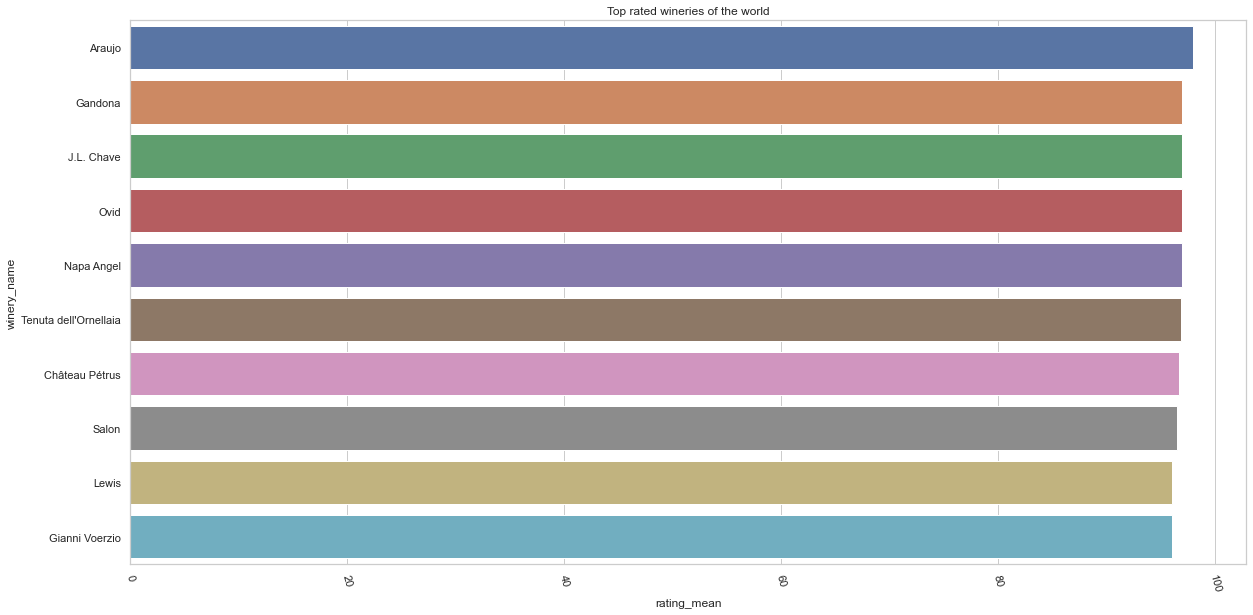

In [292]:
fig,ax = plt.subplots(figsize=(20,10));
sns.barplot( y="winery_name", x='rating_mean',ax = ax, data=data).set_title('Top rated wineries of the world')
# Rotate x-labels
plt.xticks(rotation=-75);

<h1 align='center'>*------E N D------*</h1>